<a href="https://colab.research.google.com/github/O-Kpy/Project/blob/main/%E1%84%87%E1%85%B5%E1%86%A8%E1%84%8F%E1%85%A9%E1%86%AB%E1%84%90%E1%85%A6%E1%84%89%E1%85%B3%E1%84%90%E1%85%B3_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8%E1%84%87%E1%85%AE%E1%86%AB%E1%84%8B%E1%85%A3_%E1%84%91%E1%85%B2%E1%84%8E%E1%85%A5%E1%84%89%E1%85%B3%E1%84%85%E1%85%B5%E1%84%80%E1%85%B3_%E1%84%92%E1%85%A9%E1%86%BC%E1%84%89%E1%85%AEZERO_%E1%84%83%E1%85%A2%E1%86%B7%E1%84%8B%E1%85%B2%E1%84%8B%E1%85%B5%E1%86%B8%E1%84%85%E1%85%A3%E1%86%BC%2C%E1%84%80%E1%85%A1%E1%86%BC%E1%84%8B%E1%85%AE%2C%E1%84%89%E1%85%AE%E1%84%8B%E1%85%B1%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read Me

> Data 설명

1. 데이터 집단의 의미는 무엇인가요?

 - 같이 K-댐의 유입량에 영향을 미치는 지역은 A, B, C, D, E 지역 입니다. 

 - 데이터 집단은 K-댐에 영향을 미칠 것으로 생각되는 이 다섯지역으로부터 K댐 까지의 구간거리, 시간 등을 달리 설정하여 

 - 전공분야(토목공학)에서 의미 있다고 뽑아낸 6개의 독립변수 집합입니다.

 

2. 주어진 데이터의 각 변수(유입량, 강수, 수위)의 단위가 어떻게 되나요?

 - 유입량 : m3/s, 강수량 : mm, 수위 : m 단위입니다.


> FE 계획

* columns 바꾸기

* 시계열 int로 하고

* Null값 없음

* 유입량 NaN인 row가 test set인가 보다

* 상관계수가 높아서 feature_selection과 feature_extraction 필수

* 시계열이지만 연도마다 비는 월(month)가 있다.

  * 2006년 : 6,8,9 월 없음

  * 2007년 : 6,7 월 없음

  * 2008년 : 6,8,9 월 없음

  * 2009년 : 6,9 월 없음

  * 2010년 : 6,7,8 월 없음

  * 2011년 : 9 월 없음

  * 2012년 : 6 월 없음

  * 2013년 : 6,8,9 월 없음

  * 2014,2015,2016년 빈다.

  * 2017년 : 6 월 없음, target연도

In [ ]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy
from scipy.stats import skew

In [2]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

import matplotlib as mpl
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

In [3]:
data = pd.read_excel('/content/drive/MyDrive/dataset/빅콘테스트/데이터분석분야_퓨처스리그_홍수ZERO_데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_댐유입량,강우,수위데이터_210803.xlsx')

In [4]:
data = data.drop(index=[0])

In [5]:
data['연'] = data['연'].astype('int').astype('object')
data['월'] = data['월'].astype('int').astype('object')
data['일'] = data['일'].astype('int').astype('object')
data['시간'] = data['시간'].astype('int').astype('object')

In [6]:
# data split
train = data.loc[data['유입량'].notnull()]
test = data.loc[data['유입량'].isnull()].drop(columns=['유입량'])
train.shape, test.shape

((2891, 48), (160, 47))

Text(0.5, 1.0, '연도별 월 분포')

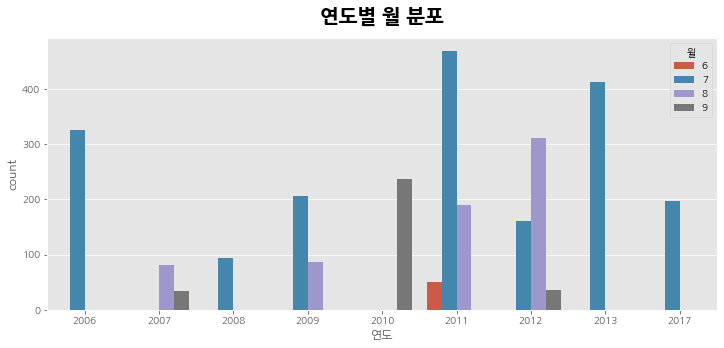

In [7]:
count = train.groupby('연')['월'].value_counts().reset_index(name='count')

plt.figure(figsize=(12,5))
sns.barplot(x=count['연'], y=count['count'], hue='월', data=count)
plt.xlabel('연도')
plt.title('연도별 월 분포', fontsize=20, pad=15, fontweight='bold')

시계열이지만 연도마다 비는 월(month)가 있다.
2006년 : 6,8,9 월 없음
2007년 : 6,7 월 없음
2008년 : 6,8,9 월 없음
2009년 : 6,9 월 없음
2010년 : 6,7,8 월 없음
2011년 : 9 월 없음
2012년 : 6 월 없음
2013년 : 6,8,9 월 없음
2017년 : 6 월 없음

Text(0.5, 0.98, '시계열 변수 vs target')

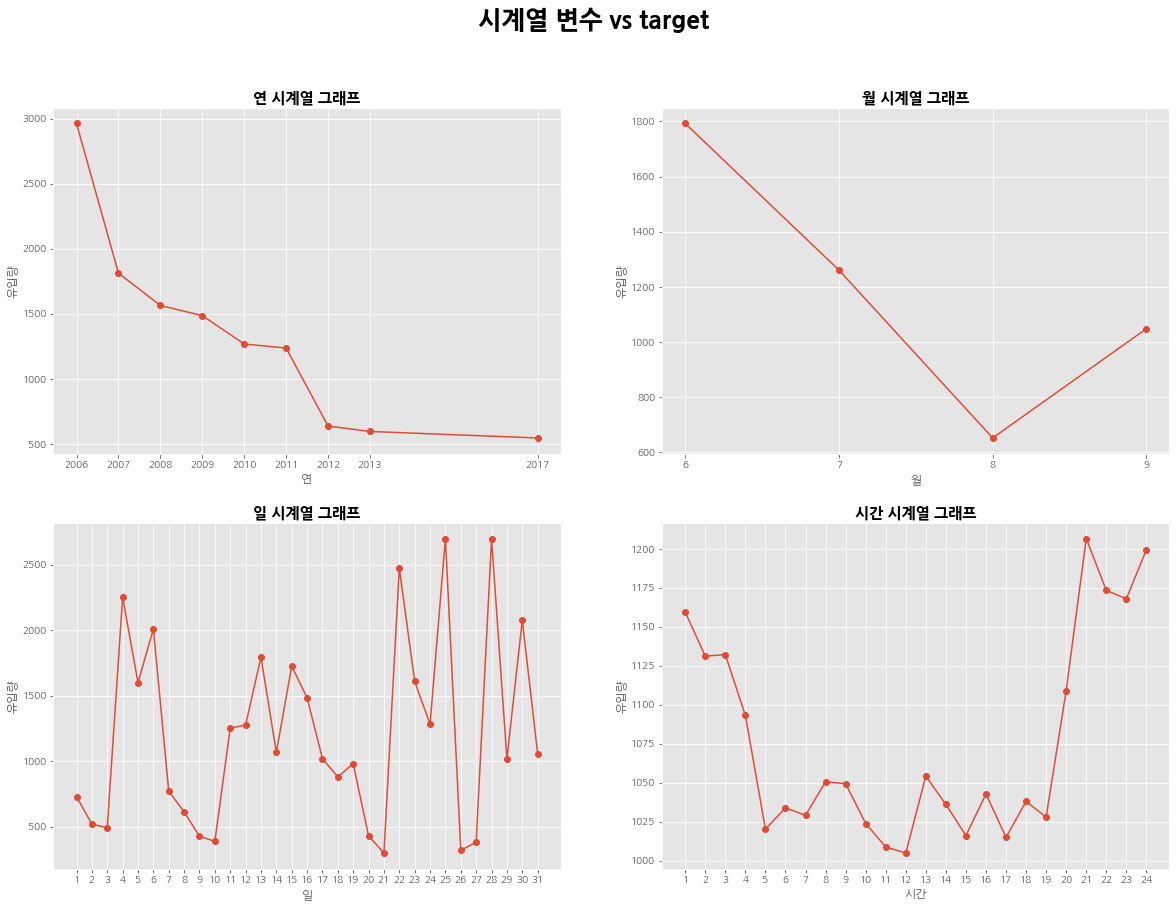

In [12]:
fig = plt.figure(figsize=(20,14))
for j, i in enumerate(['연', '월', '일', '시간']):
  plt.subplot(2,2, j+1)
  plt.plot(train.groupby(i)['유입량'].median().index, train.groupby(i)['유입량'].median(), marker='o')
  plt.xticks(train.groupby(i)['유입량'].median().index)
  plt.xlabel(f'{i}')
  plt.ylabel('유입량')
  plt.title(f'{i} 시계열 그래프', fontsize=15, fontweight='bold')
plt.suptitle('시계열 변수 vs target', fontsize=25, fontweight='bold')

In [ ]:
['데이터집단 1_유역평균강수', '데이터집단 2_유역평균강수', '데이터집단 3_유역평균강수', '데이터집단 4_유역평균강수', '데이터집단 5_유역평균강수', '데이터집단 6_유역평균강수']

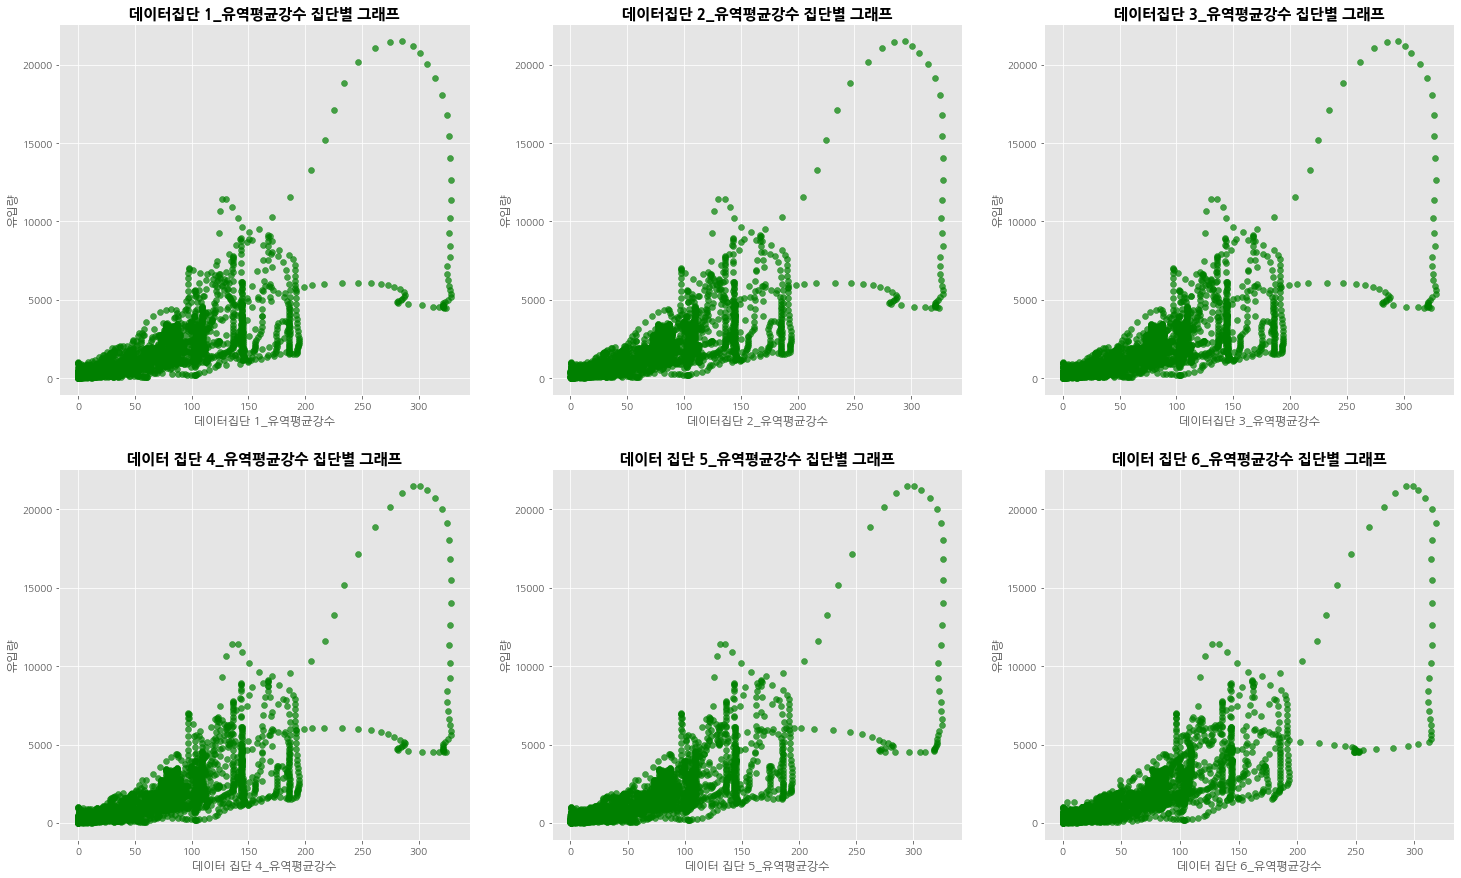

In [25]:
rain = [i for i in train.columns if i.find('유역평균강수') != -1]

plt.figure(figsize=(25,15))
for j,i in enumerate(rain):
  plt.subplot(2,3, j+1)
  plt.scatter(train[i], train['유입량'], color='green', alpha=0.7)
  plt.xlabel(f'{i}')
  plt.ylabel('유입량')
  plt.title(f'{i} 집단별 그래프', fontsize=15, fontweight='bold')

Text(0.5, 1.0, 'Train Set Correalation')

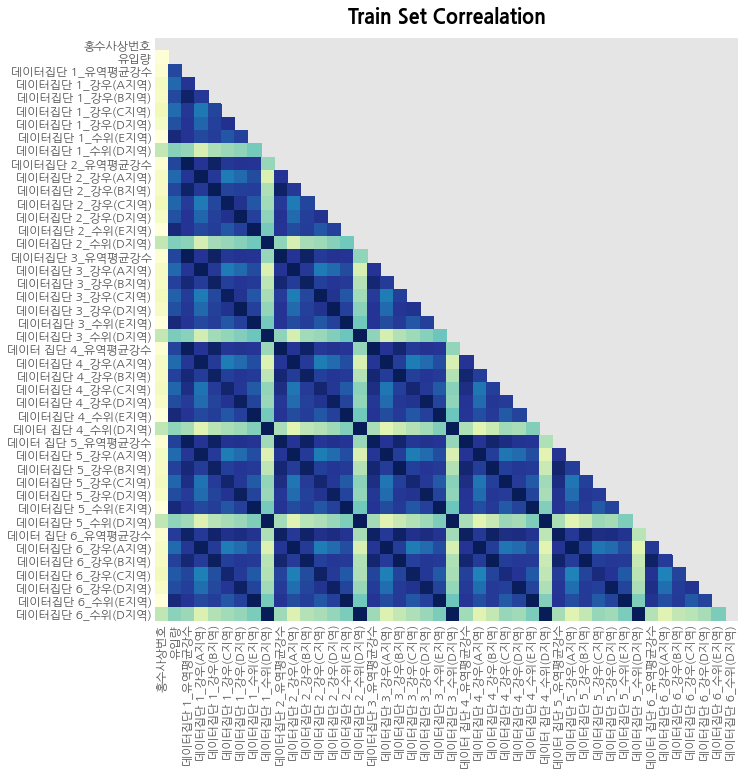

In [89]:
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
plt.figure(figsize=(12,10))
sns.heatmap(train.corr(), cmap='YlGnBu', cbar=False, square=True, mask=mask)
plt.title('Train Set Correalation', fontsize=20, pad=15, fontweight='bold')

* 집단별 강우의 상관계수가 너무 높다.
* 집단별 평균 유역평균 강수가 거의 같다. ==> pca를 해야한다.

In [26]:
!pip install catboost
!pip install optuna

     |████████████████████████████████| 67.4 MB 57 kB/s 
     |████████████████████████████████| 302 kB 8.3 MB/s 
     |████████████████████████████████| 80 kB 10.0 MB/s 
     |████████████████████████████████| 164 kB 75.7 MB/s 
     |████████████████████████████████| 75 kB 5.5 MB/s 
     |████████████████████████████████| 49 kB 7.5 MB/s 
     |████████████████████████████████| 111 kB 77.6 MB/s 
     |████████████████████████████████| 141 kB 79.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=e9b309b9b3f6538aa298858435f27b0e10157291ba3d1f89bac775e66d487c56
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


# Data Split(x_train, y_train) and scaling

In [27]:
import catboost
import xgboost
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_predict, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [28]:
x_train = train.drop(columns=['유입량'])
x_train_columns = x_train.columns
y_train = train['유입량']
x_test = test.copy()
x_test_columns = x_test.columns

In [29]:
# scaling
ss = StandardScaler().fit(x_train)
x_train = pd.DataFrame(ss.transform(x_train), columns=x_train_columns)
x_test = pd.DataFrame(ss.transform(x_test), columns=x_test_columns)

# 하이퍼파라미터 튜닝(Optuna)

In [31]:
cat_features = x_train.select_dtypes('object').columns
def objective(trial,data=x_train,target=y_train):
    
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)
    params = {'iterations':trial.suggest_int("iterations", 2000, 25000),
             'loss_function':'RMSE',
              'task_type':"GPU",
              'eval_metric':'RMSE',
              'leaf_estimation_method':'Newton',
              'bootstrap_type': 'Bernoulli',
              'learning_rate' : trial.suggest_uniform('learning_rate',0.001,0.6),
              'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
              'subsample': trial.suggest_uniform('subsample',0,1),
              'random_strength': trial.suggest_uniform('random_strength',10,50),
              'depth': trial.suggest_int('depth',1,13),
              'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,50),
              'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
              'grow_policy' : 'Depthwise'
               }
    model = catboost.CatBoostRegressor(**params)  
    model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
        
    y_preds = model.predict(X_test)


    RMSE = np.sqrt(mean_squared_error(y_test, y_preds))
    
    return RMSE

In [12]:
OPTUNA_OPTIMIZATION = True

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2021-08-20 08:43:35,748] A new study created in memory with name: no-name-645e3193-8d8b-45e3-81bb-527b20245da3
[I 2021-08-20 08:45:06,640] Trial 0 finished with value: 234.56836034069448 and parameters: {'iterations': 18964, 'learning_rate': 0.4068332683087934, 'reg_lambda': 92.14913377836886, 'subsample': 0.6663897992770839, 'random_strength': 13.790675788629368, 'depth': 13, 'min_data_in_leaf': 31, 'leaf_estimation_iterations': 8}. Best is trial 0 with value: 234.56836034069448.
[I 2021-08-20 08:45:12,799] Trial 1 finished with value: 246.31351492409632 and parameters: {'iterations': 18669, 'learning_rate': 0.34505180367996463, 'reg_lambda': 5.66117828002743, 'subsample': 0.7610195934068378, 'random_strength': 18.419671406839733, 'depth': 5, 'min_data_in_leaf': 48, 'leaf_estimation_iterations': 11}. Best is trial 0 with value: 234.56836034069448.
[I 2021-08-20 08:45:23,966] Trial 2 finished with value: 280.8570859087538 and parameters: {'iterations': 24426, 'learning_rate': 0.4523

Number of finished trials: 50
Best trial: score 149.05551850596683, params {'iterations': 22228, 'learning_rate': 0.02347018435658138, 'reg_lambda': 69.26056752012119, 'subsample': 0.05495123063462578, 'random_strength': 41.22743627630881, 'depth': 8, 'min_data_in_leaf': 4, 'leaf_estimation_iterations': 7}


In [ ]:
params_cat = {
    'iterations':study.best_params['iterations'],
    'loss_function':'RMSE',
    'task_type':"GPU",
    'eval_metric':'RMSE',
    'leaf_estimation_method':'Newton',
    'bootstrap_type': 'Bernoulli',
    'learning_rate' : study.best_params['learning_rate'],
    'reg_lambda': study.best_params['reg_lambda'],
    'subsample': study.best_params['subsample'],
    'random_strength': study.best_params['random_strength'],
    'depth': study.best_params['depth'],
    'min_data_in_leaf': study.best_params['min_data_in_leaf'],
    'leaf_estimation_iterations': study.best_params['leaf_estimation_iterations'],
    'grow_policy' : 'Depthwise'
}

In [35]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
sk = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds = np.zeros((x_test.shape[0],))



params = {'grow_policy' : 'Depthwise', 'loss_function':'RMSE', 'task_type':"GPU", 'eval_metric':'RMSE', 'leaf_estimation_method':'Newton', 'bootstrap_type': 'Bernoulli', 'iterations': 22228, 'learning_rate': 0.02347018435658138, 'reg_lambda': 69.26056752012119, 'subsample': 0.05495123063462578, 'random_strength': 41.22743627630881, 'depth': 8, 'min_data_in_leaf': 4, 'leaf_estimation_iterations': 7}

for i, (train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor(**params)
  model_cat.fit(X_train, Y_train, eval_set=(X_valid, Y_valid), early_stopping_rounds=70, verbose=100)

  preds += model_cat.predict(x_test) / kf.n_splits
  valid_preds = model_cat.predict(X_valid)
  print(f'{i+1}번째 RMSE:{np.sqrt(mean_squared_error(Y_valid, valid_preds))}')



0:	learn: 2178.5819090	test: 1772.9428176	best: 1772.9428176 (0)	total: 13.1ms	remaining: 4m 51s
100:	learn: 747.2360986	test: 481.6087982	best: 481.6087982 (100)	total: 1.24s	remaining: 4m 32s
200:	learn: 529.7049820	test: 414.6530082	best: 414.3093963 (199)	total: 2.4s	remaining: 4m 22s
300:	learn: 439.3606343	test: 392.3988471	best: 392.1813796 (298)	total: 3.52s	remaining: 4m 16s
400:	learn: 383.5541112	test: 371.4133676	best: 371.1297013 (399)	total: 4.67s	remaining: 4m 14s
500:	learn: 339.9133888	test: 350.9435361	best: 350.9435361 (500)	total: 5.76s	remaining: 4m 9s
600:	learn: 307.8600920	test: 332.3918336	best: 332.3918336 (600)	total: 6.87s	remaining: 4m 7s
700:	learn: 279.6394229	test: 316.9628609	best: 316.2279841 (697)	total: 7.98s	remaining: 4m 5s
800:	learn: 260.9322771	test: 303.2844801	best: 303.0148284 (799)	total: 9.09s	remaining: 4m 3s
900:	learn: 244.8814227	test: 290.6760135	best: 290.6760135 (900)	total: 10.2s	remaining: 4m
1000:	learn: 232.2474519	test: 279.6077

Text(0.5, 1.0, 'Preds vs True')

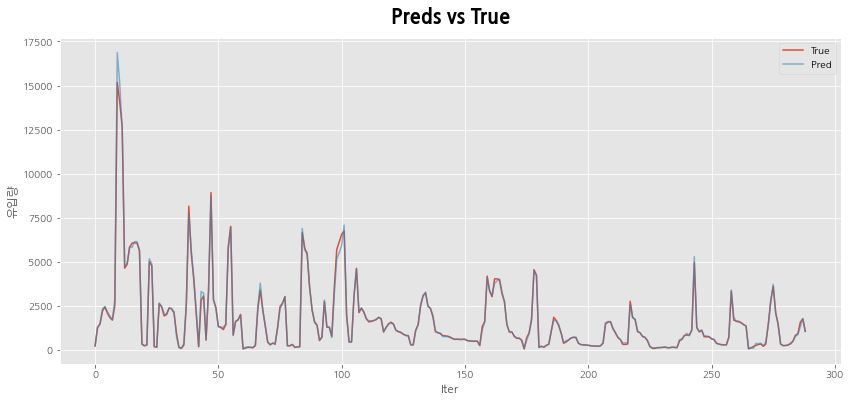

In [44]:
plt.figure(figsize=(14,6))
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=Y_valid.reset_index(drop=True), label='True')
sns.lineplot(x=Y_valid.reset_index(drop=True).index, y=valid_preds, label='Pred', alpha=0.6)
plt.xlabel('Iter')
plt.title('Preds vs True', fontsize=20, pad=15, fontweight='bold')

# overfitting 의심 된다.

Text(0.5, 1.0, 'Feature_Importance')

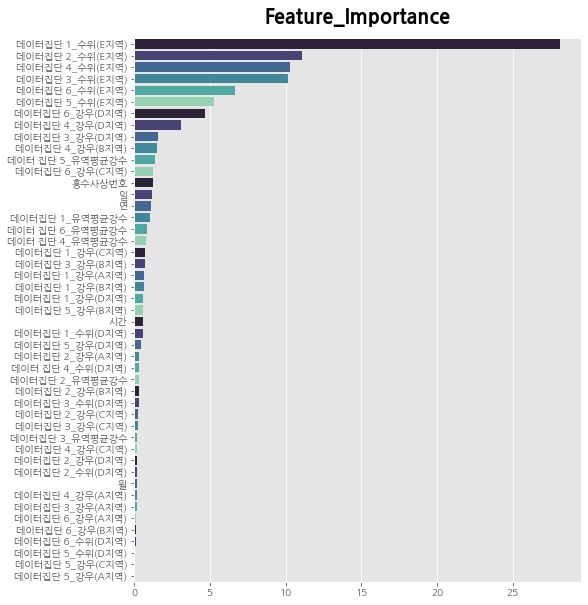

In [55]:
feature_importances = pd.Series(model_cat.feature_importances_, index=x_train_columns).sort_values(ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(y=feature_importances.index, x=feature_importances, palette=sns.color_palette('mako'))
plt.title('Feature_Importance', fontsize=20, pad=15, fontweight='bold')

In [84]:
feature_importances = pd.DataFrame({'feature':x_train_columns, 'importance':model_cat.feature_importances_})

In [85]:
def plot_feature_importance(df, n=10, threshold = None):

  df = df.sort_values('importance', ascending=False).reset_index(drop=True)

  df['importance_normalized'] = df['importance'] / df['importance'].sum()
  df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

  plt.rcParams['font.size'] = 12

  df.loc[:n, :].plot.barh(y='importance_normalized',
                          x='feature', color='darkgreen',
                          edgecolor='k', figsize=(12,8),
                          legend=False, linewidth=2)
  
  plt.xlabel('Normalized Importance', size=18)
  plt.ylabel('')
  plt.title(f'{n} Most Importance Features', size=18)
  plt.gca().invert_yaxis()

  if threshold:
        # Cumulative importance plot
        plt.figure(figsize = (8, 6))
        plt.plot(list(range(len(df))), df['cumulative_importance'], 'b-')
        plt.xlabel('Number of Features', size = 16); plt.ylabel('Cumulative Importance', size = 16); 
        plt.title('Cumulative Feature Importance', size = 18);
        
        # Number of features needed for threshold cumulative importance
        # This is the index (will need to add 1 for the actual number)
        importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
        
        # Add vertical line to plot
        plt.vlines(importance_index + 1, ymin = 0, ymax = 1.05, linestyles = '--', colors = 'red')
        plt.show();
        
        print('{} features required for {:.0f}% of cumulative importance.'.format(importance_index + 1, 
                                                                                  100 * threshold))
  return df



  

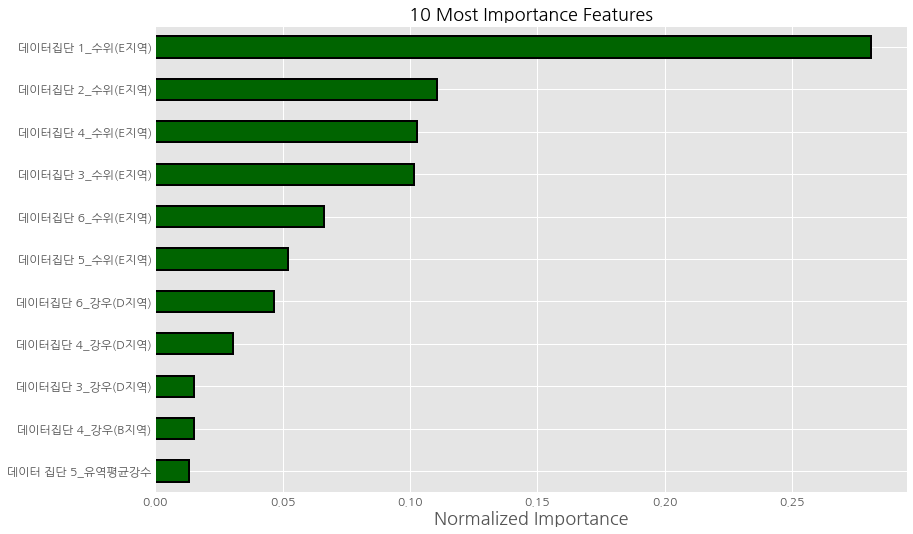

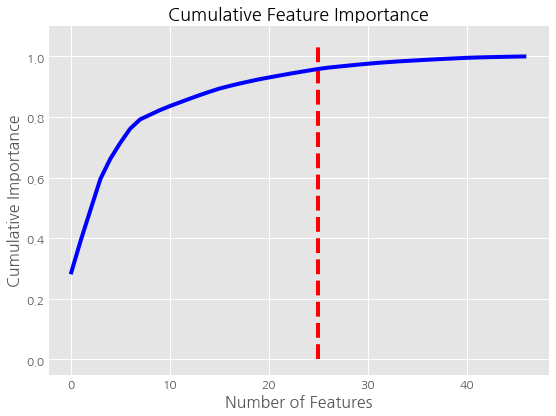

25 features required for 95% of cumulative importance.


In [86]:
norm_fi = plot_feature_importance(feature_importances, threshold=0.95)

# Submission

In [45]:
submit=pd.read_excel('/content/drive/MyDrive/dataset/빅콘테스트/데이터분석분야_퓨처스리그_홍수ZERO_데이터/2021 빅콘테스트_데이터분석분야_퓨처스리그_홍수ZERO_평가데이터_210803.xlsx')
submit = submit.drop(index=[0])
submit['유입량'] = preds
submit

,NO,홍수사상번호,연,월,일,시간,유입량
1,1.0,26.0,2018.0,7.0,1.0,6.0,88.310007
2,2.0,26.0,2018.0,7.0,1.0,7.0,107.653493
3,3.0,26.0,2018.0,7.0,1.0,8.0,191.708589
4,4.0,26.0,2018.0,7.0,1.0,9.0,305.960870
5,5.0,26.0,2018.0,7.0,1.0,10.0,372.795708
...,...,...,...,...,...,...,...
156,156.0,26.0,2018.0,7.0,7.0,17.0,393.228462
157,157.0,26.0,2018.0,7.0,7.0,18.0,381.797447
158,158.0,26.0,2018.0,7.0,7.0,19.0,376.733096
159,159.0,26.0,2018.0,7.0,7.0,20.0,365.864011


# To do

- PCA
- Stacking
- FE
- Rasso, Ridge, ElasticNet